In [9]:
import os

from life_saving_scripts.basic_utils import set_publish_matplotlib_template
from manim_utils import get_colors
from matplotlib import pyplot as plt
import numpy as np

set_publish_matplotlib_template(mode="light")

In [10]:
from manim import *

config.media_embed = True
BACKGROUND_COLOR, PRIMARY_COLOR, PRIMARY_COLORS = get_colors(dark_mode=True)
config.background_color = BACKGROUND_COLOR

In [11]:
IMAGE_DIR = "images"

# Differetiability of a Function


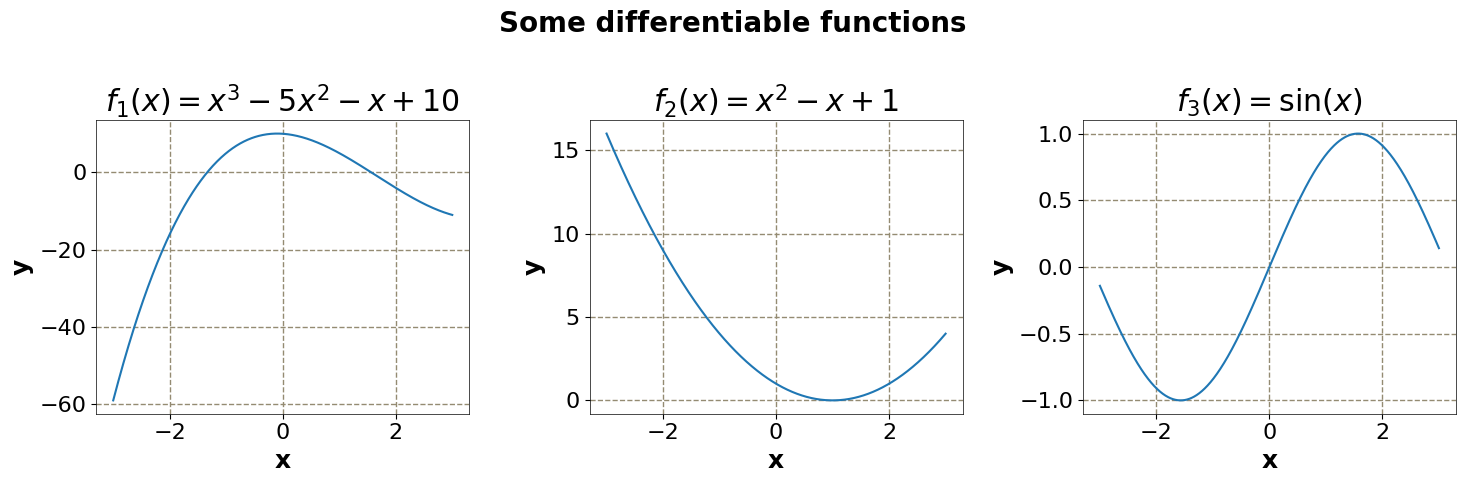

In [4]:
x = np.linspace(-3, 3, 1000)

differentiable_funcs = [
    lambda x: x**3 - 5 * x**2 - x + 10,
    lambda x: x**2 - 2 * x + 1,
    lambda x: np.sin(x),
    # lambda x: 1,
]

names = [
    "$f_1(x) = x^3 - 5x^2 - x + 10$",
    "$f_2(x) = x^2 - x + 1$",
    "$f_3(x) = \sin(x)$",
    # "$f_4(x) = 1$",
]


def get_differentiable_func(func):
    return [func(xi) for xi in x]


y = [get_differentiable_func(func) for func in differentiable_funcs]

fig, ax = plt.subplots(
    nrows=1, ncols=len(differentiable_funcs), figsize=(5 * len(differentiable_funcs), 5)
)

for i, yi in enumerate(y):
    ax[i].plot(x, yi)

    ax[i].set_title(names[i])

    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")

fig.suptitle("Some differentiable functions")

plt.tight_layout()

plt.savefig(os.path.join(IMAGE_DIR, "differentiable_funcs.png"), dpi=300)

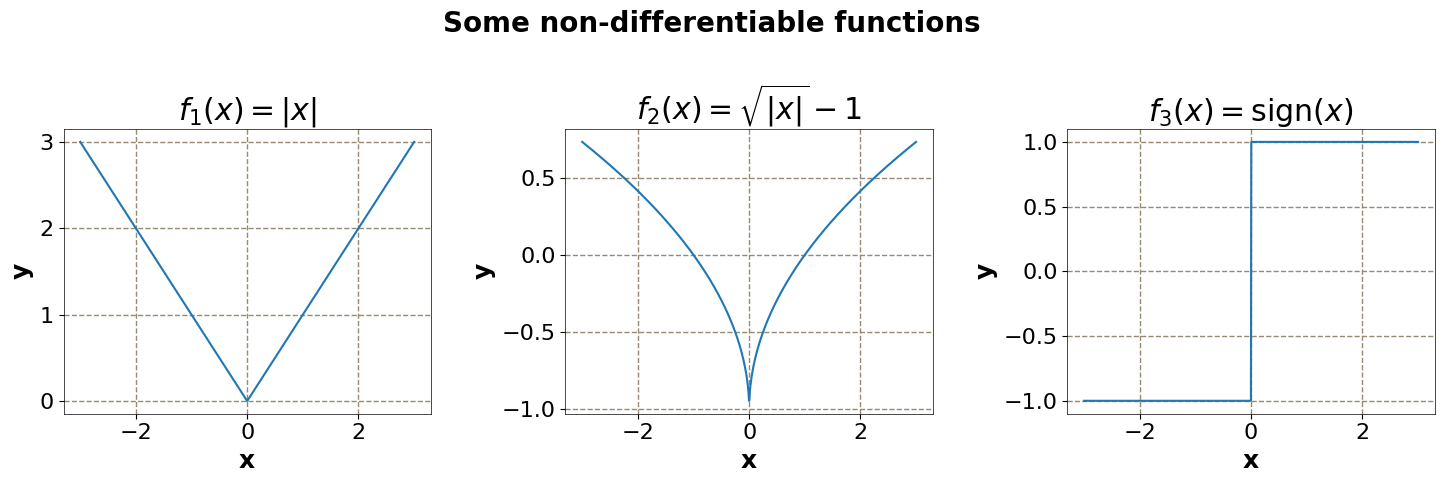

In [6]:
non_differentiable_funcs = [
    lambda x: np.abs(x),
    lambda x: np.sqrt(np.abs(x)) - 1,
    lambda x: np.sign(x),
]

names = [
    "$f_1(x) = |x|$",
    "$f_2(x) = \sqrt{|x|} - 1$",
    "$f_3(x) = \operatorname{sign}(x)$",
]

y = [get_differentiable_func(func) for func in non_differentiable_funcs]

fig, ax = plt.subplots(
    nrows=1,
    ncols=len(non_differentiable_funcs),
    figsize=(5 * len(non_differentiable_funcs), 5),
)

for i, yi in enumerate(y):
    ax[i].plot(x, yi)

    ax[i].set_title(names[i])

    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")

fig.suptitle("Some non-differentiable functions")

plt.tight_layout()

plt.savefig(os.path.join(IMAGE_DIR, "non_differentiable_funcs.png"), dpi=300)

# Convexity


## Example of Convex Function


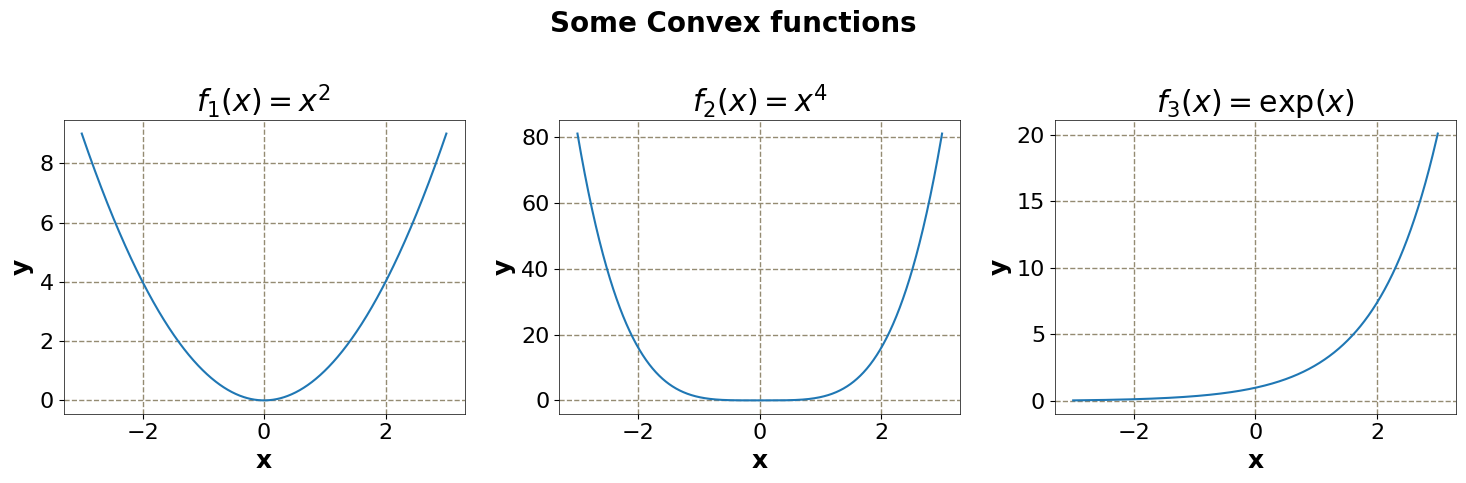

In [7]:
x = np.linspace(-3, 3, 1000)

differentiable_funcs = [
    lambda x: x**2,
    lambda x: x**4,
    lambda x: np.exp(x),  # shifted log to avoid log(0)
]

names = [
    "$f_1(x) = x^2$",
    "$f_2(x) = x^4$",
    "$f_3(x) = \exp(x)$",
]


def get_differentiable_func(func):
    return [func(xi) for xi in x]


y = [get_differentiable_func(func) for func in differentiable_funcs]

fig, ax = plt.subplots(
    nrows=1, ncols=len(differentiable_funcs), figsize=(5 * len(differentiable_funcs), 5)
)

for i, yi in enumerate(y):
    ax[i].plot(x, yi)

    ax[i].set_title(names[i])

    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")

fig.suptitle("Some Convex functions")

plt.tight_layout()

plt.savefig(os.path.join(IMAGE_DIR, "convex_funcs.png"), dpi=300)

## Example of Non-Convex Function


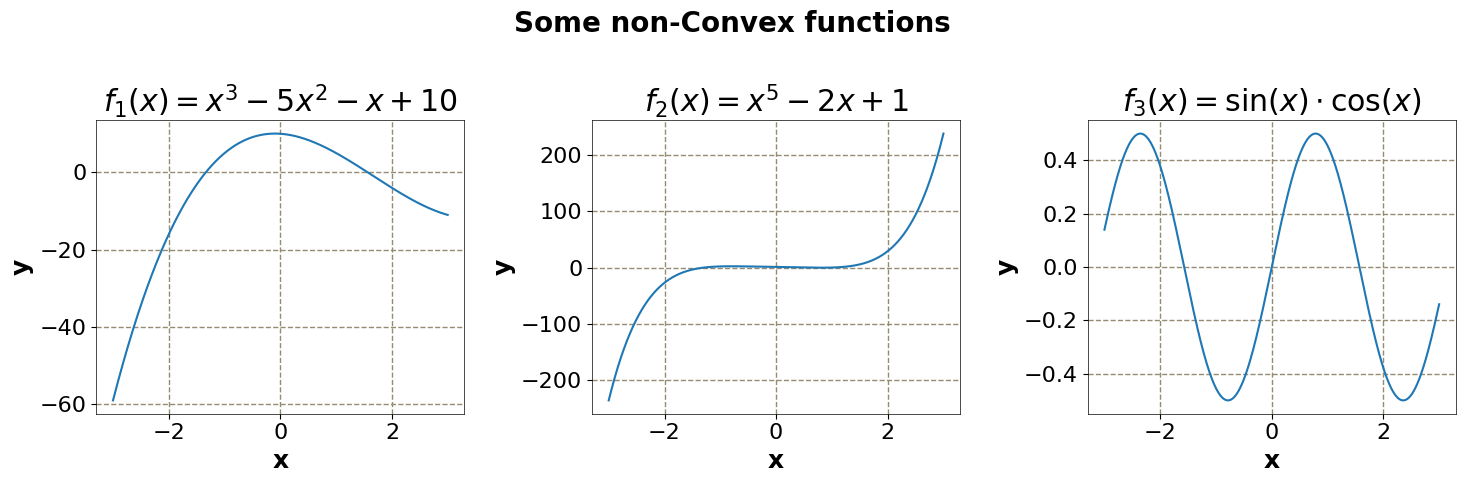

In [28]:
x = np.linspace(-3, 3, 1000)

differentiable_funcs = [
    lambda x: x**3 - 5 * x**2 - x + 10,
    lambda x: x**5 - 2 * x + 1,
    lambda x: np.sin(x) * np.cos(x),
]

names = [
    "$f_1(x) = x^3 - 5x^2 - x + 10$",
    "$f_2(x) = x^5 - 2x + 1$",
    "$f_3(x) = \sin(x) \cdot \cos(x)$",
]


def get_differentiable_func(func):
    return [func(xi) for xi in x]


y = [get_differentiable_func(func) for func in differentiable_funcs]

fig, ax = plt.subplots(
    nrows=1, ncols=len(differentiable_funcs), figsize=(5 * len(differentiable_funcs), 5)
)

for i, yi in enumerate(y):
    ax[i].plot(x, yi)

    ax[i].set_title(names[i])

    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")

fig.suptitle("Some non-Convex functions")

plt.tight_layout()

plt.savefig(os.path.join(IMAGE_DIR, "non_convex_funcs.png"), dpi=300)

## Quasi-Convex Function


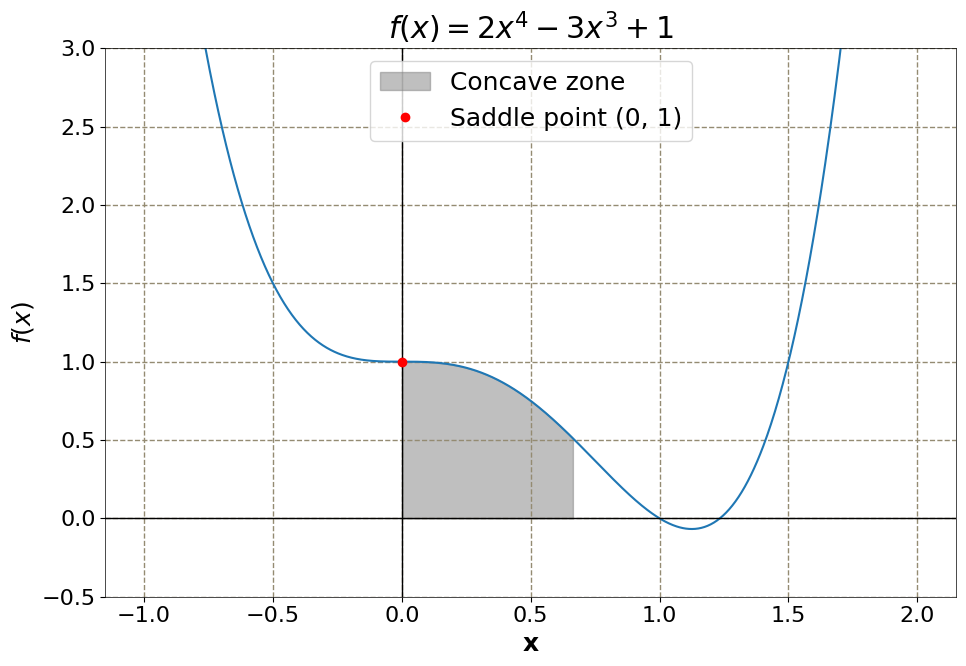

In [24]:
func_with_saddle_point = lambda x: 2 * x**4 - 3 * x**3 + 1
x = np.linspace(-1, 2, 1000)
y = func_with_saddle_point(x)
concave_zone = x[(x > 0) & (x < 2 / 3)]

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(x, y)
ax.fill_between(
    concave_zone,
    func_with_saddle_point(concave_zone),
    color="gray",
    alpha=0.5,
    label="Concave zone",
)
# set x and y axis
ax.axhline(0, color="black", lw=1)
ax.axvline(0, color="black", lw=1)

# add the saddle point 0
ax.plot(0, 1, "ro", label="Saddle point (0, 1)")

ax.set_title("$f(x) = 2x^4 - 3x^3 + 1$")
ax.set_xlabel("x")
ax.set_ylabel("$f(x)$")
ax.legend()
ax.set_ylim(-0.5, 3)

plt.tight_layout()
fig.savefig(os.path.join(IMAGE_DIR, "quasi_convex_function.png"), dpi=300)

## Animate Convexity


In [27]:
example_convex_func = lambda x: x**2 - x + 2
example_convex_func_latex = r"f(x) = x^2 - x + 2"
example_non_convex_func = lambda x: 2 * x**4 - 3 * x**3 + 1
example_non_convex_func_latex = r"f(x) = 2x^4 - 3x^3 + 1"

In [35]:
class AnimateConvex(Scene):
    x_range = (-3, 3)
    y_range = (-1, 10)

    def create_line(self, func, x1, x2):
        return Line(
            self.c2p(x1, func(x1)),
            self.c2p(x2, func(x2)),
        )

    def construct(self):
        title = Text("Convex Function", font_size=35).to_edge(UP)
        self.add(title)
        axes = Axes(
            x_range=self.x_range,
            y_range=self.y_range,
            tips=False,
        ).add_coordinates()

        graph = axes.plot(
            example_convex_func, x_range=self.x_range, use_vectorized=True, color=TEAL
        )
        self.add(axes)
        self.add(graph)
        text = MathTex(example_convex_func_latex).move_to(2 * UP + 3 * RIGHT)
        self.add(text)

        x1 = -1.8
        x2 = ValueTracker(3)  # start from 3 and move upto -3
        point_for_left_dot = axes.c2p(x1, example_convex_func(x1))
        left_dot = Dot(point_for_left_dot, color=RED)
        coordinate_text = MathTex(f"x = {x1}").next_to(left_dot, UP)
        self.add(left_dot, coordinate_text)

        right_dot = Dot(
            axes.c2p(x2.get_value(), example_convex_func(x2.get_value())), color=RED
        )
        line = Line(
            axes.c2p(x1, example_convex_func(x1)),
            axes.c2p(x2.get_value(), example_convex_func(x2.get_value())),
            color=WHITE,
        )

        def update_line(line):
            f1 = example_convex_func(x1)
            x2_ = x2.get_value()
            f2 = example_convex_func(x2_)
            line.put_start_and_end_on(
                axes.c2p(x1, f1),
                axes.c2p(x2_, f2),
            )

        def update_dot(dot, x):
            dot.move_to(axes.c2p(x, example_convex_func(x)))

        line.add_updater(update_line)
        left_dot.add_updater(lambda d: update_dot(d, x1))
        right_dot.add_updater(lambda d: update_dot(d, x2.get_value()))

        self.add(right_dot)
        self.add(line)

        self.play(x2.animate.set_value(-2.5), run_time=3, rate_func=linear)

In [36]:
%%manim -qm -o convex_function.mp4 AnimateConvex
AnimateConvex

Manim Community v0.18.1

In [37]:
class AnimateConvex(Scene):
    x_range = (-1, 2)
    y_range = (-0.2, 2.5)

    def create_line(self, func, x1, x2):
        return Line(
            self.c2p(x1, func(x1)),
            self.c2p(x2, func(x2)),
        )

    def construct(self):
        title = Text("Quasi-Convex Function", font_size=35).to_edge(UP)
        self.add(title)
        axes = Axes(
            x_range=self.x_range,
            y_range=self.y_range,
            tips=False,
        ).add_coordinates()

        graph = axes.plot(
            example_non_convex_func,
            x_range=self.x_range,
            use_vectorized=True,
            color=TEAL,
        )
        self.add(axes)
        self.add(graph)
        text = MathTex(example_non_convex_func_latex).move_to(
            axes.c2p(2, 2) - 2 * RIGHT
        )
        self.add(text)

        x1 = -0.6
        x2 = ValueTracker(1.3)

        left_dot = Dot(axes.c2p(x1, example_non_convex_func(x1)), color=RED)
        coordinate_text = MathTex(f"x = {x1}").next_to(left_dot, UP)
        self.add(left_dot, coordinate_text)
        right_dot = Dot(
            axes.c2p(x2.get_value(), example_non_convex_func(x2.get_value())), color=RED
        )
        line = Line(
            axes.c2p(x1, example_non_convex_func(x1)),
            axes.c2p(x2.get_value(), example_non_convex_func(x2.get_value())),
            color=GREEN,
        )
        region_type = (
            Text("Convex Region", color=GREEN).move_to(axes.c2p(1, 1)).scale(0.7)
        )
        self.add(region_type)

        def update_line(line):
            f1 = example_non_convex_func(x1)
            x2_ = x2.get_value()
            f2 = example_non_convex_func(x2_)
            line.put_start_and_end_on(
                axes.c2p(x1, f1),
                axes.c2p(x2_, f2),
            )
            # make line red between 2/3 and 1
            # this is not convex region but is the region where line is
            # below the curve
            # 2/3 is the saddle point and 1 global minima
            is_convex = not (x2_ > 2 / 3 and x2_ < 1)
            if is_convex:
                line.set_color(GREEN)
            else:
                line.set_color(RED)

        def update_region_type(region_type):
            is_convex = not (x2.get_value() > 0 and x2.get_value() < 2 / 3)
            if is_convex:
                region_type.become(
                    Text("Convex Region", color=GREEN)
                    .move_to(axes.c2p(1, 1))
                    .scale(0.7)
                )
            else:
                region_type.become(
                    Text("Non-Convex Region", color=RED)
                    .move_to(axes.c2p(1, 1))
                    .scale(0.7)
                )

        def update_dot(dot, x):
            dot.move_to(axes.c2p(x, example_non_convex_func(x)))

        line.add_updater(update_line)
        left_dot.add_updater(lambda d: update_dot(d, x1))
        right_dot.add_updater(lambda d: update_dot(d, x2.get_value()))
        region_type.add_updater(update_region_type)

        self.add(right_dot)
        self.add(line)

        self.play(x2.animate.set_value(-0.8), run_time=6, rate_func=linear)

In [38]:
%%manim -qm -o quasi_convex_function.mp4 AnimateConvex
AnimateConvex

Manim Community v0.18.1

## 2D Saddle Point


In [10]:
def multi_variate_func(X):
    x, y = X
    return x**2 - y**2


X = np.linspace(-2, 2, 50)
Y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(X, Y)
Z = multi_variate_func([X, Y])

# use plotly to plot the 3d surface
import plotly.graph_objects as go

fig = go.Figure(
    go.Surface(
        z=Z,
        x=X,
        y=Y,
        colorscale="Viridis",
    )
)
# plot the saddle point
fig.add_trace(
    go.Scatter3d(
        x=[0],
        y=[0],
        z=[0],
        mode="markers",
        marker=dict(size=5, color="black"),
        name="Saddle Point",
    )
)
fig.update_layout(
    title="A Multivariate Function with Saddle Point",
    scene=dict(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="z",
    ),
)
# update the size
fig.update_layout(width=1000, height=600)

# save as png
fig.write_image(os.path.join(IMAGE_DIR, "multivariate_function_with_saddle_point.png"), width = 1000, height = 600)

# Gradient Descent


In [4]:
class GradientDescent:
    def __init__(self, func, grad_func, lr=0.1, max_iter=1000):
        self.func = func
        self.grad_func = grad_func
        self.lr = lr
        self.max_iter = max_iter

    def _get_gradient(self, x):
        if self.grad_func is not None:
            return self.grad_func(x)
        else:
            # use central difference
            eps = 1e-5
            return (self.func(x + eps) - self.func(x - eps)) / (2 * eps)

    def optimize(self, start=None, eps=1e-6):
        history = []
        if start is None:
            x = np.random.randn()  # a random starting point
        else:
            x = start

        for i in range(self.max_iter):
            try:
                grad = self._get_gradient(x)
            except:
                print("Gradient exploded")
                raise

            delta = self.lr * grad
            if not isinstance(delta, np.ndarray):
                delta = np.array([delta])

            if np.linalg.norm(delta) < eps:
                break

            x = x - delta
            hist = {"x": x, "grad": grad}
            history.append(hist)
        return x, history

## Single Variable


Text(0.5, 0, 'x')

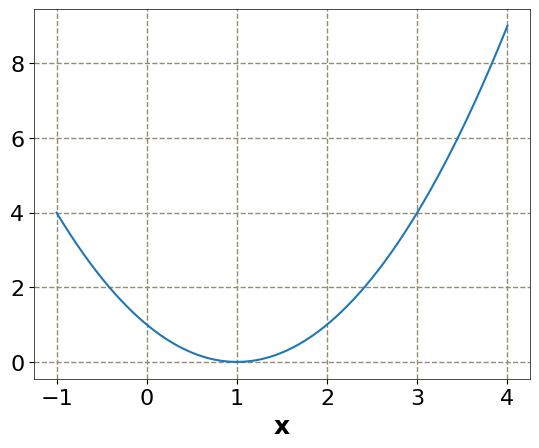

In [5]:
func = lambda x: x**2 - 2 * x + 1
grad_func = lambda x: 2 * x - 2

x = np.linspace(-1, 4, 1000)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel("x")
# ax.set_ylim(-0.5, 3)

(-0.5, 3.0)

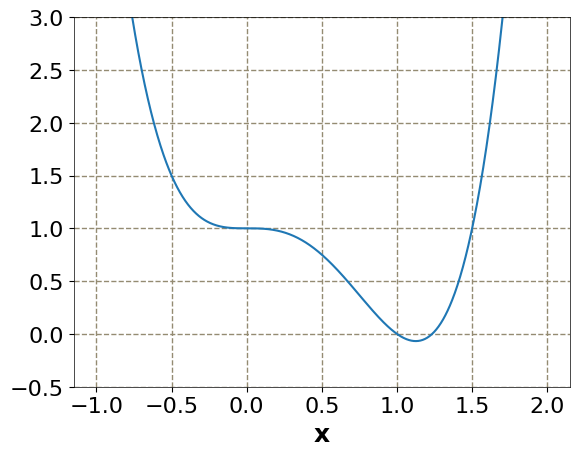

In [6]:
func_with_saddle_point = lambda x: 2 * x**4 - 3 * x**3 + 1
grad_func_with_saddle_point = lambda x: 8 * x**3 - 9 * x**2

x = np.linspace(-1, 2, 1000)
y = func_with_saddle_point(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel("x")
ax.set_ylim(-0.5, 3)

In [8]:
# gd = GradientDescent(
#     func_with_saddle_point, grad_func_with_saddle_point, lr=0.2, max_iter=50
# )
# x_min, history = gd.optimize(start=-0.25, eps=1e-6)
# history

In [11]:
class GradientDescentScene(Scene):
    start = 3
    max_iter = 50
    lr = 0.4
    func = lambda self, x: x**2 - 2 * x + 1
    grad_func = lambda self, x: 2 * x - 2
    x_range = [-1, 6]
    y_range = [-0.5, 12]
    add_x_value = True
    eps = 1e-3
    dot_update_run_time = 1

    def optimize(self):
        gd = GradientDescent(
            self.func, self.grad_func, lr=self.lr, max_iter=self.max_iter
        )
        x_min, history = gd.optimize(start=self.start, eps=self.eps)
        return x_min, history

    def construct(self):
        # t1 = Text("Gradient Descent").scale(0.5).to_corner(UP)
        # t2 = Text("(On Convex Function)").scale(0.3).next_to(t1, RIGHT)
        # self.add(t1, t2)
        self.add(MathTex(r"\text{lr}" + f"={self.lr}").to_corner(UP))
        # self.add(Text(f"Starting Point: {self.start}").scale(0.5).to_corner(UP))
        axes = Axes(
            x_range=self.x_range,
            y_range=self.y_range,
            tips=False,
        ).add_coordinates()

        graph = axes.plot(
            self.func, x_range=self.x_range, use_vectorized=False, color=TEAL
        )
        self.add(axes)
        self.add(graph)

        x_min, history = self.optimize()
        dot = Dot(axes.c2p(self.start, self.func(self.start)), color=RED).scale(1.5)
        x_value = MathTex(f"x = {self.start:.2f}", color=RED).next_to(dot, UP)
        iteration_value = Text(f"It: 0", color=BLUE).scale(0.5).to_edge(UR)
        tracker = ValueTracker(self.start)
        dot.add_updater(
            lambda d: d.move_to(
                axes.c2p(tracker.get_value(), self.func(tracker.get_value()))
            )
        )

        x_value.add_updater(lambda m: m.next_to(dot, UP))
        self.add(dot)
        if self.add_x_value:
            self.add(x_value)
        self.add(iteration_value)

        for it, hist in enumerate(history):
            x = hist["x"]
            if abs(x) > 10:
                break
            self.play(tracker.animate.set_value(x), run_time=self.dot_update_run_time)
            if self.add_x_value:
                x_value.become(
                    MathTex(f"x = {tracker.get_value():.2f}", color=RED).next_to(
                        dot, UP
                    )
                )  # update x value
            iteration_value.become(
                Text(f"It: {it + 1}", color=BLUE).scale(0.5).to_edge(UR)
            )
        self.wait(0.1)

        num_iterated = len(history)
        if num_iterated == self.max_iter:
            converged = False
        else:
            converged = True
        m = "Converged" if converged else "Not Converged"
        c = "Converged" if converged else "Current"
        summary = MarkupText(
            f"{m} After: {num_iterated} It\n{c} Value: {x_min[0]:.2f}"
        ).scale(0.5)
        summary.set_color(GREEN)
        summary.to_corner(UL)
        self.play(Write(summary))
        self.wait(2)

In [90]:
%%manim -qm -o convex_medium_lr.mp4 GradientDescentScene
GradientDescentScene

Manim Community v0.18.1

## Multiple Variables


In [5]:
def multi_variate_func(X):
    return (X[0] - 1) ** 2 + (X[1] - 2) ** 2  # a convex function


def multi_variate_grad_func(X):
    return np.array([2 * (X[0] - 1), 2 * (X[1] - 2)])

Text(0.5, 0.92, 'A Multivariate Function')

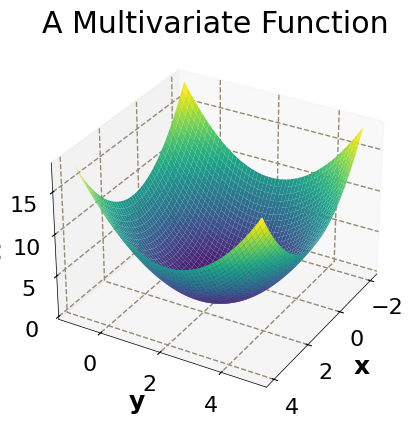

In [6]:
X = np.linspace(-2, 4, 50)
Y = np.linspace(-1, 5, 50)
X, Y = np.meshgrid(X, Y)
Z = multi_variate_func([X, Y])


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis")
# set camera angle
ax.view_init(30, 30)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("A Multivariate Function")

In [7]:
gd = GradientDescent(multi_variate_func, multi_variate_grad_func, lr=0.2, max_iter=50)
start = np.array([-1, -1])
x_min, history = gd.optimize(start=start, eps=1e-6)

In [8]:
from tqdm.auto import tqdm

/home/hari/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
class GradientDescentScene3D(ThreeDScene):
    start = np.array([-1, -1])
    max_iter = 30
    lr = 0.2
    x_range = [-2, 4]
    y_range = [-1, 5]
    z_range = [-1, 20]
    add_x_value = True
    eps = 1e-3
    dot_update_run_time = 1

    def func(self, u, v):
        return multi_variate_func([u, v])

    def grad_func(self, u, v):
        return multi_variate_grad_func([u, v])

    def optimize(self):
        gd = GradientDescent(
            multi_variate_func,
            multi_variate_grad_func,
            lr=self.lr,
            max_iter=self.max_iter,
        )
        x_min, history = gd.optimize(start=self.start, eps=self.eps)
        return x_min, history

    def construct(self):
        t1 = Text("Gradient Descent").scale(0.5).to_corner(UP)
        t2 = Text("(in 3D)").scale(0.3).next_to(t1, RIGHT)
        self.add_fixed_in_frame_mobjects(t1, t2)

        axes = ThreeDAxes(
            x_range=self.x_range,
            y_range=self.y_range,
            z_range=self.z_range,
            x_length=8,
            y_length=8,
            z_length=8,
        ).add_coordinates()
        self.set_camera_orientation(phi=60 * DEGREES, theta=15 * DEGREES)
        graph = Surface(
            lambda u, v: axes.c2p(*np.array([u, v, self.func(u, v)])),
            u_range=self.x_range,
            v_range=self.y_range,
            resolution=(12, 12),
            fill_color=GRAY,
            checkerboard_colors=[GRAY_D, GRAY_E],
        )
        self.add(axes)
        self.add(graph)
        graph_center = axes.c2p(
            (self.x_range[0] + self.x_range[1]) / 2,
            (self.y_range[0] + self.y_range[1]) / 2,
            (self.z_range[0] + self.z_range[1]) / 2,
        )
        self.camera.frame_center = graph_center

        _, history = self.optimize()

        dot = Dot3D(
            axes.c2p(self.start[0], self.start[1], self.func(*self.start)),
            color=RED,
            z_index=1,
        ).scale(1.5)
        self.add(dot)
        x_value = (
            MathTex(
                r"\text{Current} " + f"({self.start[0]:.2f}, {self.start[1]:.2f})",
                color=RED,
                z_index=1,
            )
            .to_corner(0.2*LEFT + UP)
            .scale(0.7)
        )
        iteration_value = Text(f"It: 0", color=BLUE).scale(0.5).to_edge(UR)

        if self.add_x_value:
            self.add_fixed_in_frame_mobjects(x_value)
        self.add_fixed_in_frame_mobjects(iteration_value)

        for it, hist in tqdm(enumerate(history), total=len(history)):
            x = hist["x"]
            if np.linalg.norm(x) > 10:
                break

            self.play(
                dot.animate.move_to(axes.c2p(x[0], x[1], self.func(*x))),
                run_time=self.dot_update_run_time,
            )
            if self.add_x_value:
                x_value.become(
                    MathTex(
                        r"\text{Current} " + f"({x[0]:.2f}, {x[1]:.2f})", color=RED
                    )
                    .to_corner(0.2*LEFT + UP)
                    .scale(0.7)
                )
            iteration_value.become(
                Text(f"It: {it + 1}", color=BLUE).scale(0.5).to_edge(UR)
            )

        self.wait(0.1)
        if self.add_x_value:
            self.remove(x_value)

        num_iterated = len(history)
        if num_iterated == self.max_iter:
            converged = False
        else:
            converged = True
        m = "Converged" if converged else "Not Converged"
        c = "Converged" if converged else "Current"
        summary = MarkupText(
            f"{m} After: {num_iterated} It\n{c} Value: ({x[0]:.2f}, {x[1]:.2f})"
        ).scale(0.5)
        summary.set_color(GREEN)
        summary.to_corner(UL)
        self.add_fixed_in_frame_mobjects(summary)
        self.play(Write(summary))
        self.wait(2)

In [125]:
%%manim -ql -o gd_for_multivariables.mp4 GradientDescentScene3D
GradientDescentScene3D

Manim Community v0.18.1

100%|██████████| 15/15 [01:05<00:00,  4.34s/it]


Manim Community v0.18.1

100%|██████████| 2/2 [00:01<00:00,  1.18it/s]


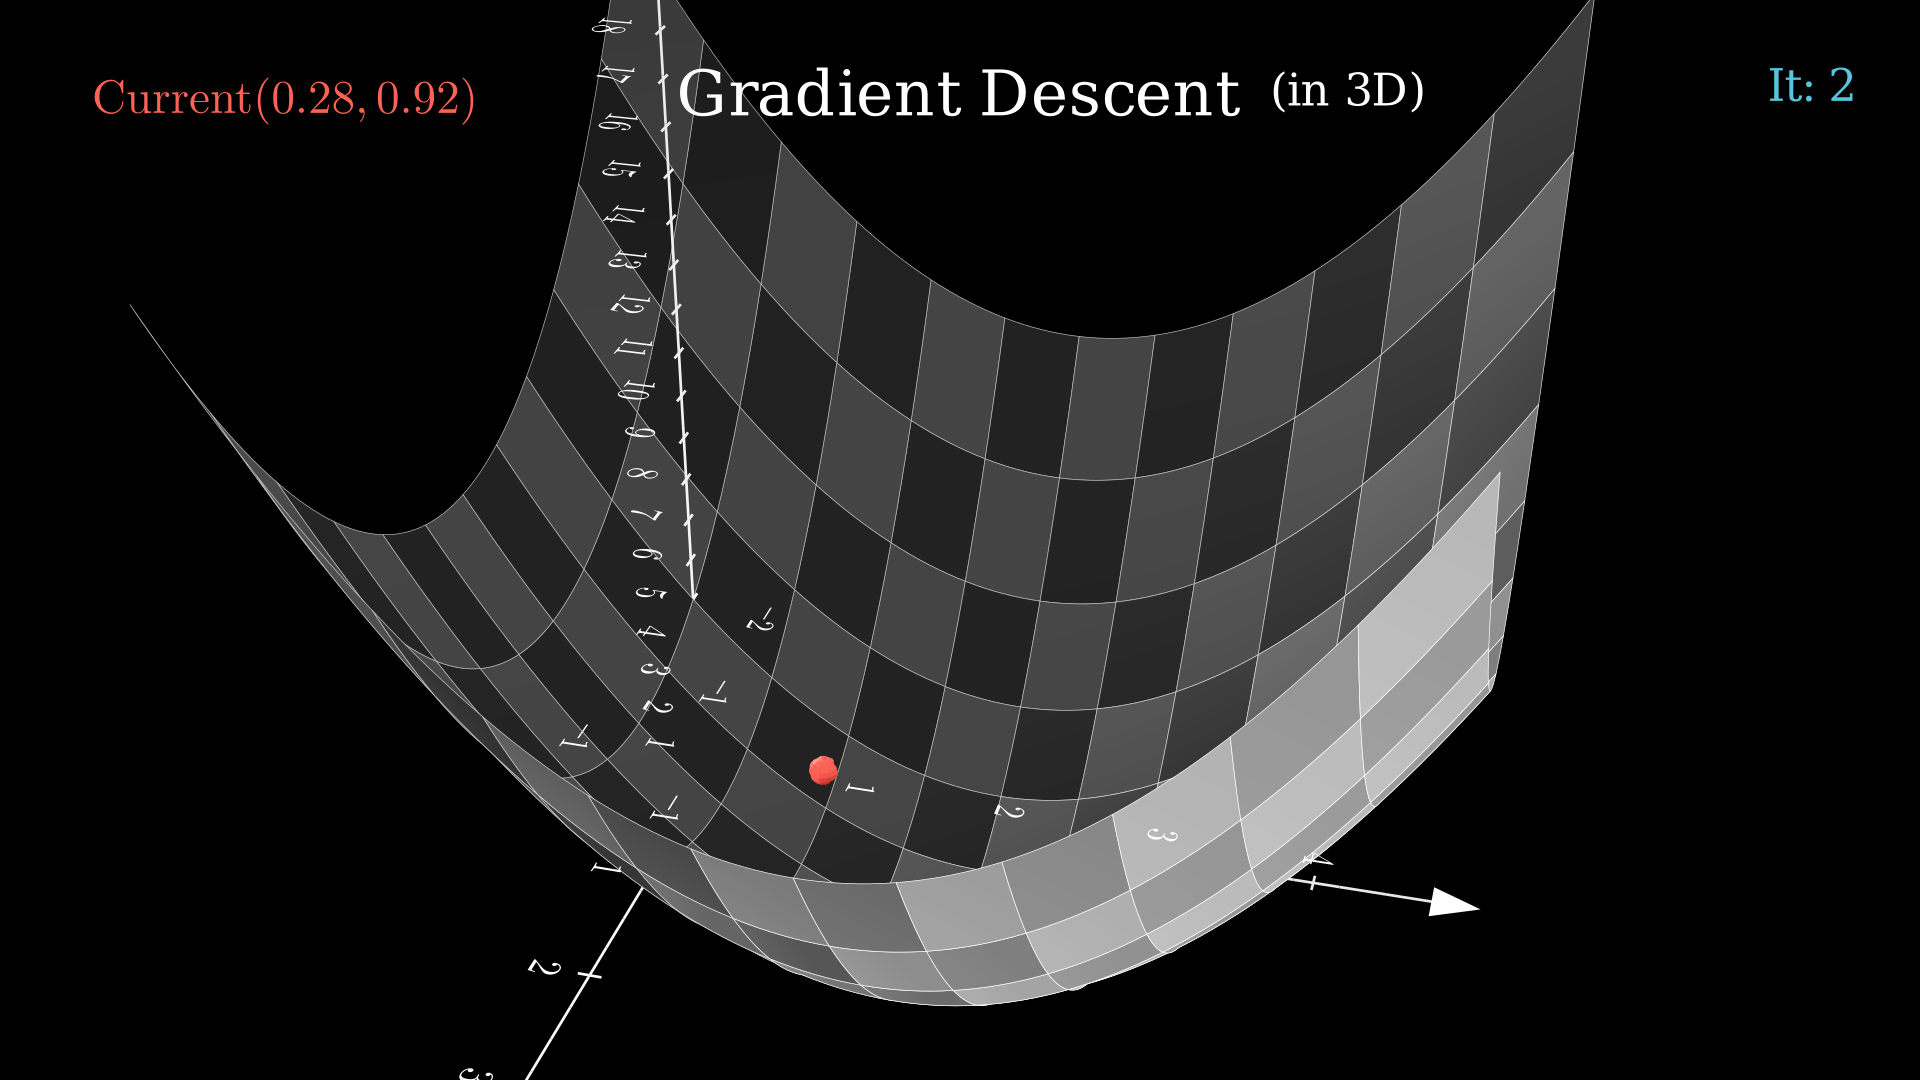

In [17]:
%%manim -qh -s -o banner.png GradientDescentScene3D
GradientDescentScene3D